In [1]:
import time
import torch
import sbibm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from scipy.ndimage.measurements import label
from sklearn.cluster import KMeans
from scipy import spatial
import itertools
import argparse

/tmp/ipykernel_3525366/2463450284.py:11: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [2]:
img = np.random.randint(low=0, high=2, size=(10, 10, 10, 10))

In [10]:
img_active = np.where(img == 1)
active_locs = set(zip(*img_active))

components = []
while len(active_locs) > 0:
    component = set()
    to_branch = {active_locs.pop()}
    while len(to_branch) > 0:
        current_loc = to_branch.pop()
        component.add(current_loc)
        current_loc_arr = np.array(current_loc) # necessary to change component values
        for dim in range(len(current_loc_arr)):
            for displacement in [-1, 1]:
                displacement_loc = np.zeros(len(current_loc_arr)).astype(int)
                displacement_loc[dim] = displacement
                candidate_loc = tuple(current_loc_arr + displacement_loc)
                if candidate_loc in active_locs:
                    active_locs.remove(candidate_loc)
                    to_branch.add(candidate_loc)
    components.append(np.array(list(component)))

In [11]:
components[0]

array([[8, 3, 8, 0],
       [5, 6, 7, 5],
       [4, 2, 0, 5],
       ...,
       [5, 7, 3, 4],
       [1, 8, 2, 2],
       [6, 7, 4, 0]])

In [12]:
img[tuple(components[0].T)]

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(components[0])

In [16]:
kmeans.cluster_centers_

array([[3.97854356, 1.80429129, 6.15279584, 4.08322497],
       [4.90538765, 6.97043364, 6.57227332, 4.73718791],
       [4.57495881, 4.67215815, 1.49423394, 4.73421197]])

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [6]:
comp_idx = 5
comp_img = np.zeros_like(img)
comp = np.array([list(pos) for pos in components[comp_idx]])
comp_img[tuple(comp.T)] = 1

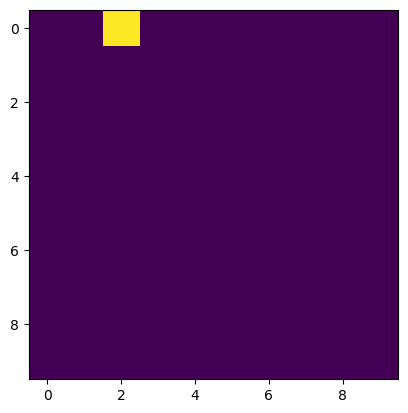

In [82]:
plt.imshow(comp_img)
